In [53]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
import numpy as np
from imblearn.over_sampling import RandomOverSampler

In [54]:
df = pd.read_csv(Path('Loan_Default.csv'))
df = df.drop(columns=['year','ID','Gender'])
df

,loan_limit,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,Interest_rate_spread,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,cf,nopre,type1,p1,l1,nopc,nob/c,116500,NaN,NaN,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,cf,nopre,type2,p1,l1,nopc,b/c,206500,NaN,NaN,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,cf,pre,type1,p1,l1,nopc,nob/c,406500,4.560,0.2000,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,cf,nopre,type1,p4,l1,nopc,nob/c,456500,4.250,0.6810,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,cf,pre,type1,p1,l1,nopc,nob/c,696500,4.000,0.3042,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148665,cf,nopre,type1,p3,l1,nopc,nob/c,436500,3.125,0.2571,...,CIB,659,EXP,55-64,to_inst,71.792763,south,direct,0,48.0
148666,cf,nopre,type1,p1,l1,nopc,nob/c,586500,5.190,0.8544,...,CIB,569,CIB,25-34,not_inst,74.428934,south,direct,0,15.0
148667,cf,nopre,type1,p4,l1,nopc,nob/c,446500,3.125,0.0816,...,CIB,702,EXP,45-54,not_inst,61.332418,North,direct,0,49.0
148668,cf,nopre,type1,p4,l1,nopc,nob/c,196500,3.500,0.5824,...,EXP,737,EXP,55-64,to_inst,70.683453,North,direct,0,29.0


In [55]:
#print(df.isnull().sum())

In [56]:
#df['loan_limit'].fillna(df['loan_limit'].mean(), inplace = True)
#print(df.isnull().sum())

In [57]:
# for row, index in df.iterrows():
#     for i in range(0,len(df.iloc[0])):
#         if df.iloc[i,"index"].isna() == True:
#             df.iloc[i] = df.iloc[:,i].mean()
# df

In [75]:
import matplotlib.pyplot as plt

In [ ]:
df.hist

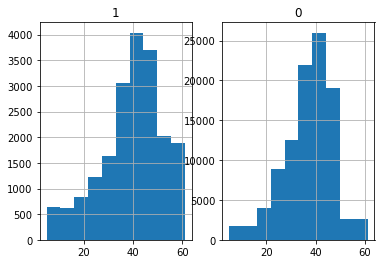

In [85]:
fig, ax=plt.subplots(1, 2)
plot_count=0
for status in df['Status'].unique(): 
    df[df['Status']==status].dtir1.hist(ax=ax[plot_count])
    ax[plot_count].set_title(status)
    plot_count+=1

In [70]:
df.Status.value_counts()
df = df.drop(columns = ["rate_of_interest","Interest_rate_spread","Upfront_charges"])
df

0    112031
1     36639
Name: Status, dtype: int64

In [71]:
df.dropna(inplace=True)

In [72]:
df.Status.value_counts()
# df = df.drop(columns = ["rate_of_interest","Interest_rate_spread","Upfront_charges"])
# df

0    100879
1     19647
Name: Status, dtype: int64

In [59]:
cats = df.dtypes[df.dtypes=='object'].index
cats

Index(['loan_limit', 'approv_in_adv', 'loan_type', 'loan_purpose',
       'Credit_Worthiness', 'open_credit', 'business_or_commercial',
       'Neg_ammortization', 'interest_only', 'lump_sum_payment',
       'construction_type', 'occupancy_type', 'Secured_by', 'total_units',
       'credit_type', 'co-applicant_credit_type', 'age',
       'submission_of_application', 'Region', 'Security_Type'],
      dtype='object')

In [60]:
cols = df.drop(columns = cats)
cols

,loan_amount,term,property_value,income,Credit_Score,LTV,Status,dtir1
0,116500,360.0,118000.0,1740.0,758,98.728814,1,45.0
1,206500,360.0,NaN,4980.0,552,NaN,1,NaN
2,406500,360.0,508000.0,9480.0,834,80.019685,0,46.0
3,456500,360.0,658000.0,11880.0,587,69.376900,0,42.0
4,696500,360.0,758000.0,10440.0,602,91.886544,0,39.0
...,...,...,...,...,...,...,...,...
148665,436500,180.0,608000.0,7860.0,659,71.792763,0,48.0
148666,586500,360.0,788000.0,7140.0,569,74.428934,0,15.0
148667,446500,180.0,728000.0,6900.0,702,61.332418,0,49.0
148668,196500,180.0,278000.0,7140.0,737,70.683453,0,29.0


In [ ]:
model.predict([0, 0, 0, 0, 0, 0, 0, 0, 720]) => 0.8 high risk

In [ ]:
model.predict([0, 0, 0, 0, 0, 0, 0, 0, 780]) => 0.69 low risk | 0.7 approve more loans -> generate more income & higher chance of making mistake -> losses

In [ ]:
# accuracy score
# approving a loan when it should have been rejected

# True = high risk
# recall to be high - TP / (TP+FN)
# precision will be lower - TP / (TP+FP)

In [86]:
model.predict([0, 0, 0, 0, 0, 0, 0, 0, 750])

NameError: name 'model' is not defined

In [9]:
test = df.dropna()
test.Status.value_counts()

0    100879
1     19647
Name: Status, dtype: int64

In [61]:
cols.isnull().sum()

loan_amount           0
term                 41
property_value    15098
income             9150
Credit_Score          0
LTV               15098
Status                0
dtir1             24121
dtype: int64

In [62]:
for i in cols:
    print(cols['Status'].corr(df[i]))

-0.0368252755443805
-0.00023982428649341355
-0.0488641271851315
-0.06511896960828174
0.004003693595588527
0.03889546617224202
1.0
0.07808306605281926


In [12]:
#df.isnull().sum()

In [64]:
#cols['rate_of_interest'].fillna(cols['rate_of_interest'].mean(), inplace = True)
#cols['Interest_rate_spread'].fillna(cols['Interest_rate_spread'].mean(), inplace = True)
#cols['Upfront_charges'].fillna(cols['Upfront_charges'].mean(), inplace = True)
cols['term'].fillna(cols['term'].mean(), inplace = True)
cols['property_value'].fillna(cols['property_value'].mean(), inplace = True)
cols['income'].fillna(cols['income'].mean(), inplace = True)
cols['LTV'].fillna(cols['LTV'].mean(), inplace = True)
cols['dtir1'].fillna(cols['dtir1'].mean(), inplace = True)

In [65]:
cols.isnull().sum()

loan_amount       0
term              0
property_value    0
income            0
Credit_Score      0
LTV               0
Status            0
dtir1             0
dtype: int64

In [14]:
#cols['rate_of_interest'].fillna(cols['rate_of_interest'].mean(), inplace = True)

In [66]:
for i in cols:
    print(cols['Status'].corr(df[i]))


-0.0368252755443805
-0.00023982428649341355
-0.0488641271851315
-0.06511896960828174
0.004003693595588527
0.03889546617224202
1.0
0.07808306605281926


In [17]:
df.isna().head(10)#.sum()

,loan_limit,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,term,Neg_ammortization,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [67]:
df.Status.value_counts()

0    112031
1     36639
Name: Status, dtype: int64

In [68]:
cats = list(df.dtypes[df.dtypes == 'object'].index)

In [69]:
cats

['loan_limit',
 'approv_in_adv',
 'loan_type',
 'loan_purpose',
 'Credit_Worthiness',
 'open_credit',
 'business_or_commercial',
 'Neg_ammortization',
 'interest_only',
 'lump_sum_payment',
 'construction_type',
 'occupancy_type',
 'Secured_by',
 'total_units',
 'credit_type',
 'co-applicant_credit_type',
 'age',
 'submission_of_application',
 'Region',
 'Security_Type']

In [21]:
for i in cats:
    print(df[i].value_counts())

cf     135348
ncf      9978
Name: loan_limit, dtype: int64
nopre    124621
pre       23141
Name: approv_in_adv, dtype: int64
type1    113173
type2     20762
type3     14735
Name: loan_type, dtype: int64
p3    55934
p4    54799
p1    34529
p2     3274
Name: loan_purpose, dtype: int64
l1    142344
l2      6326
Name: Credit_Worthiness, dtype: int64
nopc    148114
opc        556
Name: open_credit, dtype: int64
nob/c    127908
b/c       20762
Name: business_or_commercial, dtype: int64
not_neg    133420
neg_amm     15129
Name: Neg_ammortization, dtype: int64
not_int     141560
int_only      7110
Name: interest_only, dtype: int64
not_lpsm    145286
lpsm          3384
Name: lump_sum_payment, dtype: int64
sb    148637
mh        33
Name: construction_type, dtype: int64
pr    138201
ir      7340
sr      3129
Name: occupancy_type, dtype: int64
home    148637
land        33
Name: Secured_by, dtype: int64
1U    146480
2U      1477
3U       393
4U       320
Name: total_units, dtype: int64
CIB     481

In [22]:
enc = OneHotEncoder(sparse=False)


In [23]:
cats_enc = enc.fit_transform(df[cats])

In [24]:
cats_enc

array([[1., 0., 0., ..., 1., 0., 1.],
       [1., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 1., 0., 1.],
       ...,
       [1., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 1.]])

In [25]:
df_enc = pd.DataFrame(cats_enc,
                     columns = enc.get_feature_names(cats))
df_enc.isnull().sum()

C:\Users\Gabe\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


loan_limit_cf             0
loan_limit_ncf            0
loan_limit_nan            0
approv_in_adv_nopre       0
approv_in_adv_pre         0
                         ..
Region_North-East         0
Region_central            0
Region_south              0
Security_Type_Indriect    0
Security_Type_direct      0
Length: 61, dtype: int64

In [26]:
df_final = pd.concat([cols, df_enc], axis=1)

In [27]:
# good_loan = df_final[df_final.Status==0][:36639].copy()
# bad_loan = df_final[df_final.Status==1].copy()
# trimmed_loan = pd.concat([good_loan, bad_loan])
# trimmed_loan

In [28]:
# y = trimmed_loan.Status
# y
# X = trimmed_loan.drop(columns = 'Status')
# X.isnull().sum()

In [29]:
y = df_final.Status
y
X = df_final.drop(columns = 'Status')
X.isnull().sum()

loan_amount               0
term                      0
property_value            0
income                    0
Credit_Score              0
                         ..
Region_North-East         0
Region_central            0
Region_south              0
Security_Type_Indriect    0
Security_Type_direct      0
Length: 68, dtype: int64

In [30]:
df_final

,loan_amount,term,property_value,income,Credit_Score,LTV,Status,dtir1,loan_limit_cf,loan_limit_ncf,...,age_nan,submission_of_application_not_inst,submission_of_application_to_inst,submission_of_application_nan,Region_North,Region_North-East,Region_central,Region_south,Security_Type_Indriect,Security_Type_direct
0,116500,360.0,118000.000000,1740.0,758,98.728814,1,45.000000,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,206500,360.0,497893.465696,4980.0,552,72.746457,1,37.732932,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,406500,360.0,508000.000000,9480.0,834,80.019685,0,46.000000,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,456500,360.0,658000.000000,11880.0,587,69.376900,0,42.000000,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,696500,360.0,758000.000000,10440.0,602,91.886544,0,39.000000,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148665,436500,180.0,608000.000000,7860.0,659,71.792763,0,48.000000,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
148666,586500,360.0,788000.000000,7140.0,569,74.428934,0,15.000000,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
148667,446500,180.0,728000.000000,6900.0,702,61.332418,0,49.000000,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
148668,196500,180.0,278000.000000,7140.0,737,70.683453,0,29.000000,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [32]:
scaler = StandardScaler()
X_scaler = scaler.fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [33]:
X_train_scaled

array([[-1.11738103,  0.42588032, -1.00442995, ..., -0.87161105,
        -0.01436374,  0.01436374],
       [ 0.30502914,  0.42588032,  0.14916529, ...,  1.14730073,
        -0.01436374,  0.01436374],
       [ 0.96152614, -0.60159495,  0.11958593, ..., -0.87161105,
        -0.01436374,  0.01436374],
       ...,
       [-0.13263553,  0.42588032, -0.41284265, ...,  1.14730073,
        -0.01436374,  0.01436374],
       [-0.07792745,  0.42588032, -0.41284265, ...,  1.14730073,
        -0.01436374,  0.01436374],
       [-0.40617595, -1.62907022, -0.0283109 , ...,  1.14730073,
        -0.01436374,  0.01436374]])

In [34]:
# ros = RandomOverSampler()

In [35]:
# ros.fit_resample()
# X_train_scaled = ros.fit_resample(X_train_scaled)

In [36]:
#ros.fit_resample(X_train_scaled, y_train)

In [37]:
X_train_scaled


array([[-1.11738103,  0.42588032, -1.00442995, ..., -0.87161105,
        -0.01436374,  0.01436374],
       [ 0.30502914,  0.42588032,  0.14916529, ...,  1.14730073,
        -0.01436374,  0.01436374],
       [ 0.96152614, -0.60159495,  0.11958593, ..., -0.87161105,
        -0.01436374,  0.01436374],
       ...,
       [-0.13263553,  0.42588032, -0.41284265, ...,  1.14730073,
        -0.01436374,  0.01436374],
       [-0.07792745,  0.42588032, -0.41284265, ...,  1.14730073,
        -0.01436374,  0.01436374],
       [-0.40617595, -1.62907022, -0.0283109 , ...,  1.14730073,
        -0.01436374,  0.01436374]])

In [38]:
pd.DataFrame(X_train_scaled)

,0,1,2,3,4,5,6,7,8,9,...,58,59,60,61,62,63,64,65,66,67
0,-1.117381,0.425880,-1.004430,-0.709906,0.071742,0.195337,-2.671150,0.314655,-0.269269,-0.151661,...,-0.03731,-0.740890,0.743143,-0.03731,-1.003576,-0.091412,4.022510,-0.871611,-0.014364,0.014364
1,0.305029,0.425880,0.149165,0.338091,-0.247591,-0.058399,-1.530393,0.314655,-0.269269,-0.151661,...,-0.03731,1.349727,-1.345637,-0.03731,-1.003576,-0.091412,-0.248601,1.147301,-0.014364,0.014364
2,0.961526,-0.601595,0.119586,-0.298543,1.720191,0.570101,0.854825,0.314655,-0.269269,-0.151661,...,-0.03731,1.349727,-1.345637,-0.03731,-1.003576,-0.091412,4.022510,-0.871611,-0.014364,0.014364
3,-1.007965,0.425880,-0.501581,-0.788261,-1.464509,-0.746747,1.165941,-3.178089,-0.269269,6.593653,...,-0.03731,-0.740890,0.743143,-0.03731,-1.003576,-0.091412,-0.248601,1.147301,-0.014364,0.014364
4,-0.077927,0.425880,0.000953,-0.484636,-0.722275,0.000610,-0.002512,0.314655,-0.269269,-0.151661,...,-0.03731,-0.740890,0.743143,-0.03731,-1.003576,-0.091412,4.022510,-0.871611,-0.014364,0.014364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111497,1.399191,0.425880,1.066126,-0.024300,-1.067500,-0.116218,0.128889,0.314655,-0.269269,-0.151661,...,-0.03731,1.349727,-1.345637,-0.03731,-1.003576,-0.091412,-0.248601,1.147301,-0.014364,0.014364
111498,0.906818,0.425880,0.267483,0.367474,1.521687,0.311784,-0.389637,0.314655,-0.269269,-0.151661,...,-0.03731,1.349727,-1.345637,-0.03731,0.996437,-0.091412,-0.248601,-0.871611,-0.014364,0.014364
111499,-0.132636,0.425880,-0.412843,-0.494430,-1.240113,0.343075,2.306698,0.314655,-0.269269,-0.151661,...,-0.03731,-0.740890,0.743143,-0.03731,-1.003576,-0.091412,-0.248601,1.147301,-0.014364,0.014364
111500,-0.077927,0.425880,-0.412843,-0.308337,-0.178546,0.417415,1.891877,0.314655,-0.269269,-0.151661,...,-0.03731,-0.740890,0.743143,-0.03731,-1.003576,-0.091412,-0.248601,1.147301,-0.014364,0.014364


In [39]:
y_train

91251     1
117136    0
23610     1
18637     0
97353     1
         ..
73349     0
109259    0
50057     0
5192      0
128037    1
Name: Status, Length: 111502, dtype: int64

In [40]:
help(tf.keras.activations.softplus)

Help on function softplus in module keras.activations:

softplus(x)
    Softplus activation function, `softplus(x) = log(exp(x) + 1)`.
    
    Example Usage:
    
    >>> a = tf.constant([-20, -1.0, 0.0, 1.0, 20], dtype = tf.float32)
    >>> b = tf.keras.activations.softplus(a)
    >>> b.numpy()
    array([2.0611537e-09, 3.1326166e-01, 6.9314718e-01, 1.3132616e+00,
             2.0000000e+01], dtype=float32)
    
    Args:
        x: Input tensor.
    
    Returns:
        The softplus activation: `log(exp(x) + 1)`.



In [41]:
nn = Sequential()

In [42]:
hidden_nodes1 = 4
hidden_nodes2 = 2
hidden_nodes3 = 1
final_nodes = 1
num_features = len(X_train.iloc[0])


nn.add(Dense(units = hidden_nodes1, input_dim = num_features, activation = 'relu'))
nn.add(Dense(units = hidden_nodes2, activation = 'relu'))
nn.add(Dense(units = hidden_nodes3, activation = 'relu'))
nn.add(Dense(units = final_nodes, activation = 'sigmoid'))
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 276       
                                                                 
 dense_1 (Dense)             (None, 2)                 10        
                                                                 
 dense_2 (Dense)             (None, 1)                 3         
                                                                 
 dense_3 (Dense)             (None, 1)                 2         
                                                                 
Total params: 291
Trainable params: 291
Non-trainable params: 0
_________________________________________________________________


In [43]:
nn.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [44]:
fit_model = nn.fit(X_train_scaled, y_train, epochs = 10)

Epoch 1/10
3485/3485 [==============================] - 8s 2ms/step - loss: 0.5766 - accuracy: 0.7534
Epoch 2/10
3485/3485 [==============================] - 7s 2ms/step - loss: 0.5586 - accuracy: 0.7534
Epoch 3/10
3485/3485 [==============================] - 8s 2ms/step - loss: 0.5586 - accuracy: 0.7534
Epoch 4/10
3485/3485 [==============================] - 8s 2ms/step - loss: 0.5586 - accuracy: 0.7534
Epoch 5/10
3485/3485 [==============================] - 8s 2ms/step - loss: 0.5586 - accuracy: 0.7534
Epoch 6/10
3485/3485 [==============================] - 7s 2ms/step - loss: 0.5586 - accuracy: 0.7534
Epoch 7/10
3485/3485 [==============================] - 8s 2ms/step - loss: 0.5586 - accuracy: 0.7534
Epoch 8/10
3485/3485 [==============================] - 7s 2ms/step - loss: 0.5586 - accuracy: 0.7534
Epoch 9/10
3485/3485 [==============================] - 8s 2ms/step - loss: 0.5586 - accuracy: 0.7534
Epoch 10/10
3485/3485 [==============================] - 7s 2ms/step - loss: 0.558

In [45]:
# help(fit_model)

In [46]:
model_loss, model_accuracy = nn.evaluate(X_test_scaled, y_test, verbose=2)

# Display the evaluation results
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

1162/1162 - 2s - loss: 0.5579 - accuracy: 0.7540 - 2s/epoch - 2ms/step
Loss: 0.557857096195221, Accuracy: 0.7540357112884521


In [47]:
prediction = nn.predict(X)

4646/4646 [==============================] - 8s 2ms/step


In [48]:
# len(y)
# y

In [49]:
prediction[:20]

array([[0.24592401],
       [0.24592401],
       [0.24592401],
       [0.24592401],
       [0.24592401],
       [0.24592401],
       [0.24592401],
       [0.24592401],
       [0.24592401],
       [0.24592401],
       [0.24592401],
       [0.24592401],
       [0.24592401],
       [0.24592401],
       [0.24592401],
       [0.24592401],
       [0.24592401],
       [0.24592401],
       [0.24592401],
       [0.24592401]], dtype=float32)

In [50]:
df_final.Status.value_counts()

0    112031
1     36639
Name: Status, dtype: int64

In [51]:
prediction1 = np.where(prediction > .5, 1, 0)
len(prediction1)

148670

In [52]:
from sklearn.metrics import classification_report
print(classification_report(y, prediction1))

              precision    recall  f1-score   support

           0       0.75      1.00      0.86    112031
           1       0.00      0.00      0.00     36639

    accuracy                           0.75    148670
   macro avg       0.38      0.50      0.43    148670
weighted avg       0.57      0.75      0.65    148670



C:\Users\Gabe\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Gabe\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Gabe\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
